# Hierarchical Clustering in Trading

We will start our strategy by first importing the libraries and the dataset.

In [1]:
# Data manipulation
import numpy as np
import pandas as pd

# Technical indicators
import talib as ta

# Plotting graphs
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid')

# Machine learning
# Scaling the data
from sklearn.preprocessing import StandardScaler

from sklearn import metrics
import scipy.cluster.hierarchy as sc
from sklearn.cluster import AgglomerativeClustering

# The data is stored in the directory 'data_modules'
path = "../data_modules/"

# Read the data
DF = pd.read_csv(path + 'sample_stocks.csv', index_col=0)
DF

,ROE(%),Beta
ADBE,28.84,0.96
AEP,10.27,0.26
CSCO,22.53,0.89
EXC,8.57,0.43
FB,22.18,1.29
GOOGL,15.19,1.00
INTC,23.77,0.59
LNT,10.90,0.33
MSFT,34.74,0.78
STLD,21.34,1.45


We will scale the data as well.

In [2]:
# Making a copy to work with
df = DF.copy()

scaler = StandardScaler()
df_values = scaler.fit_transform(df.values)

# Printing pre-processed data
print(df_values)

[[ 1.29583307  0.59517359]
 [-1.00653849 -1.27029587]
 [ 0.51349787  0.40862664]
 [-1.21731025 -0.81725329]
 [ 0.47010369  1.4746092 ]
 [-0.39654021  0.70177185]
 [ 0.66723728 -0.39086027]
 [-0.92842895 -1.08374893]
 [ 2.02733507  0.11548144]
 [ 0.36595764  1.90100222]
 [-0.77592938 -0.47080896]
 [-1.01521733 -1.16369762]]


#### Create a Dendrogram

We start by importing the library that will help to create dendrograms. Dendrogram helps to give a rough idea of the number of clusters.

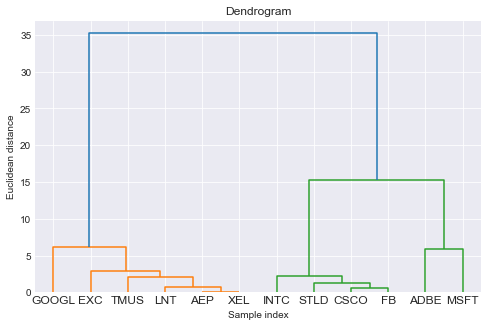

In [3]:
# Plot a dendrogram
plt.figure(figsize=(8, 5))  
plt.title("Dendrograms")  

# Create a dendrogram
sc.dendrogram(sc.linkage(df, method='ward'),labels=df.index)

plt.title('Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Euclidean distance')
plt.show()

By looking at the above dendrogram, we divide the data into two clusters.

#### Fit the Model

We instantiate the AgglomerativeClustering. We will then pass the Euclidean distance as the measure of the distance between points and Ward linkage to calculate clusters' proximity.Then we fit the model on our data points. Finally, we return an array of integers where the values correspond to the distinct categories using lables_ property.

In [4]:
# Instantiate the clustering algorithm
cluster = AgglomerativeClustering(
    n_clusters=2, affinity='euclidean', linkage='ward')

# Using the fit function
cluster.fit(df_values) 
DF['labels']=cluster.labels_
DF

,ROE(%),Beta,labels
ADBE,28.84,0.96,0
AEP,10.27,0.26,1
CSCO,22.53,0.89,0
EXC,8.57,0.43,1
FB,22.18,1.29,0
GOOGL,15.19,1.00,0
INTC,23.77,0.59,0
LNT,10.90,0.33,1
MSFT,34.74,0.78,0
STLD,21.34,1.45,0


#### Pros and Cons of Hierarchical Clustering

1. Like K-means clustering, we don't need to specify the number of clusters required for the algorithm.

2. It doesn’t work well on a large dataset. It is generally applicable to a smaller data. If you have a large dataset, it can become difficult to determine the correct number of clusters by the dendrogram.

3. In comparison to K-means, hierarchical clustering is computationally heavy and takes longer time to run.

#### Conclusion

Despite the limitations of hierarchical clustering when it comes to large datasets, it is still a great tool to deal with small to medium dataset and find patterns in them.